In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [33]:
x123 = np.array([1,10,20,40,50,70,80,90,120])
y123 = np.array([3,20,90,110,130,70,150,200,260])

In [34]:
linreg = LinearRegression()

In [35]:
x123 = x123.reshape(-1,1)

In [36]:
linreg.fit(x123,y123)

LinearRegression()

In [37]:
y_pred  = linreg.predict(x123)

In [38]:
y_pred

array([ 16.47244591,  33.34264057,  52.08730131,  89.57662279,
       108.32128352, 145.810605  , 164.55526574, 183.29992648,
       239.53390869])

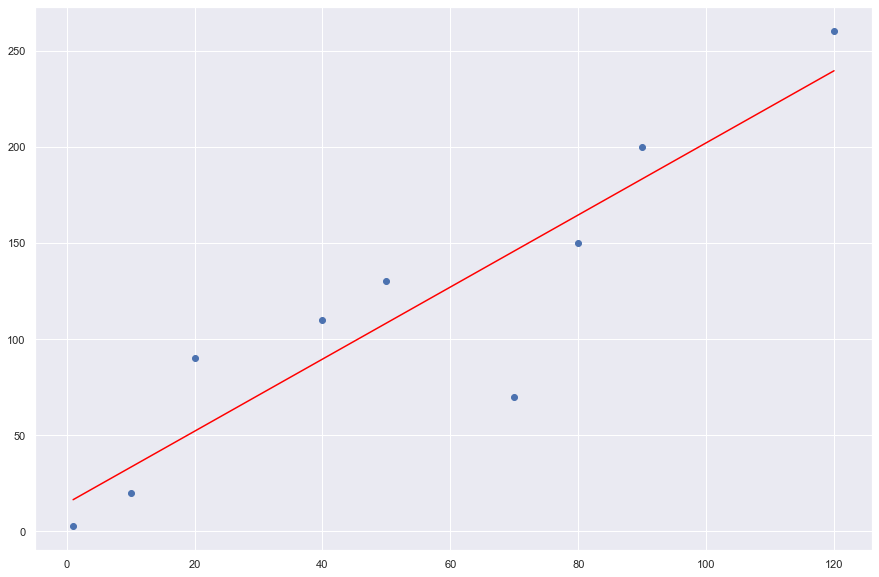

In [39]:
plt.scatter(x123, y123)
plt.plot(x123, y_pred, c="red")

In [40]:
print(linreg.coef_)

[1.87446607]


In [41]:
print(linreg.intercept_)

14.597979833344993


In [42]:
1*1.87446607 + 14.597979833344993

16.472445903344994

In [43]:
data = pd.read_csv("car_data_all_together.csv")

In [44]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data["price"], data["horsepower"])

<AxesSubplot:xlabel='price', ylabel='horsepower'>

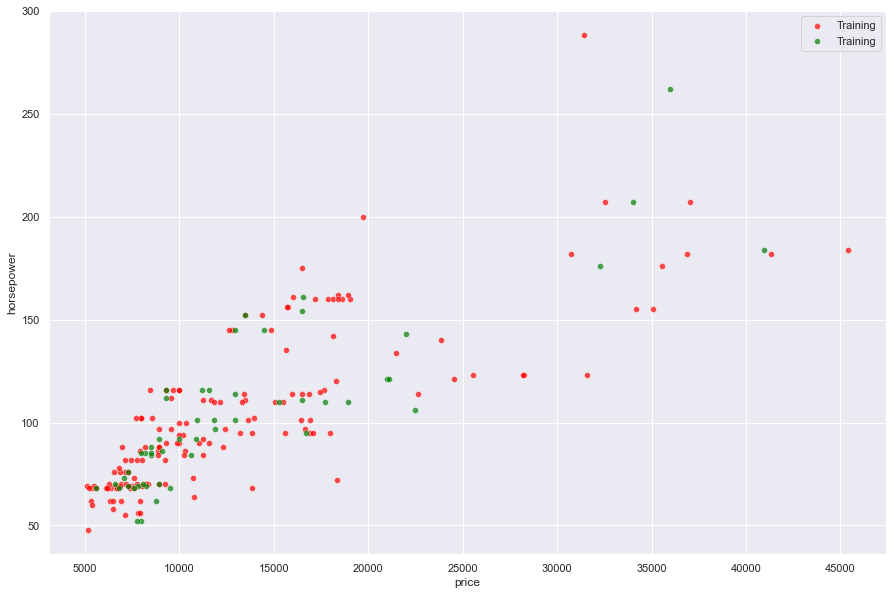

In [45]:
sns.scatterplot(x=x_train1, y=y_train1, label="Training", color="red", alpha=0.7)
sns.scatterplot(x=x_test1, y=y_test1, label="Training", color="green", alpha=0.7)

In [46]:
# Create linear model.
lr = LinearRegression()
lr.fit(x_train1.values.reshape(-1,1), y_train1.values)

LinearRegression()

In [47]:
prediction1 = lr.predict(x_test1.values.reshape(-1,1))

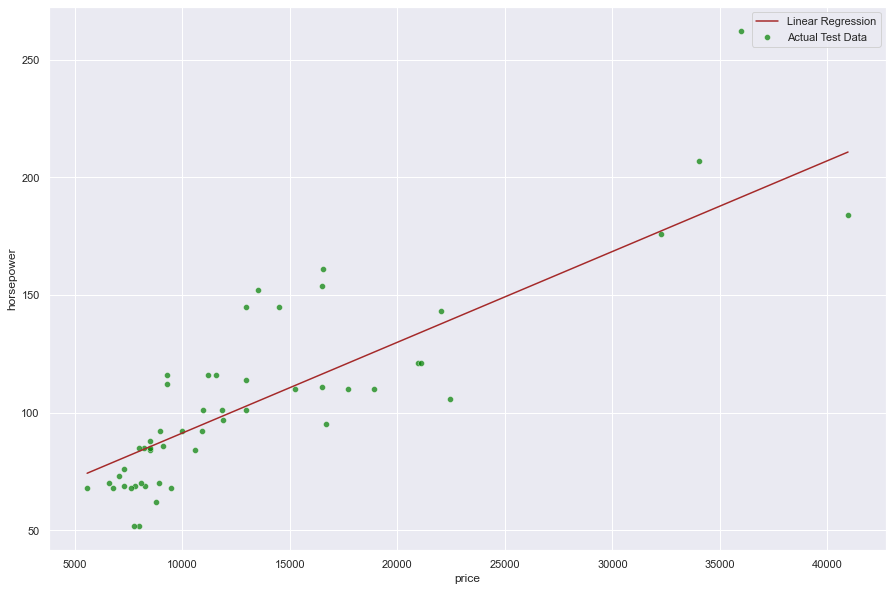

In [48]:
sns.lineplot(x=x_test1, y=prediction1, label="Linear Regression", color="brown")
sns.scatterplot(x=x_test1, y=y_test1, label="Actual Test Data", color="green", alpha=0.7)
plt.legend()
plt.show()

In [49]:
# Predict the horsepower of a car with the price of 25000.
print("The predicted horsepower of a car that costs 25000 is: ", round(lr.predict([[25000]])[0],2), "hp")

The predicted horsepower of a car that costs 25000 is:  149.18 hp


In [50]:
# Score this model.
lr.score(x_test1.values.reshape(-1,1), y_test1.values)
# The max it could get is 1.0

0.7173106650017333

In [51]:
lr.score(x_train1.values.reshape(-1,1), y_train1.values)

0.6282467754470384

In [52]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [53]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])
new_raw_data.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_diesel,fueltype_gas
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,four,130,...,0,1,0,0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,four,130,...,0,1,0,0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,six,152,...,0,0,0,0,0,0,1,0,0,1
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,four,109,...,0,0,0,0,1,0,0,0,0,1
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,five,136,...,0,0,0,0,1,0,0,0,0,1


In [54]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])

new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'four'] = 4
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'five'] = 5
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'six'] = 6
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'eight'] = 8
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'twelve'] = 12
new_raw_data['cylindernumber'] = new_raw_data['cylindernumber'].astype(int)

warnings.simplefilter(action='ignore', category=FutureWarning)

new_raw_data.dtypes

C:\Users\krist\AppData\Local\Temp\ipykernel_18660\1262568791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
C:\Users\krist\AppData\Local\Temp\ipykernel_18660\1262568791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
C:\Users\krist\AppData\Local\Temp\ipykernel_18660\1262568791.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

car_ID                    int64
symboling                 int64
CarName                  object
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int32
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelocation_front      uint8
enginelo

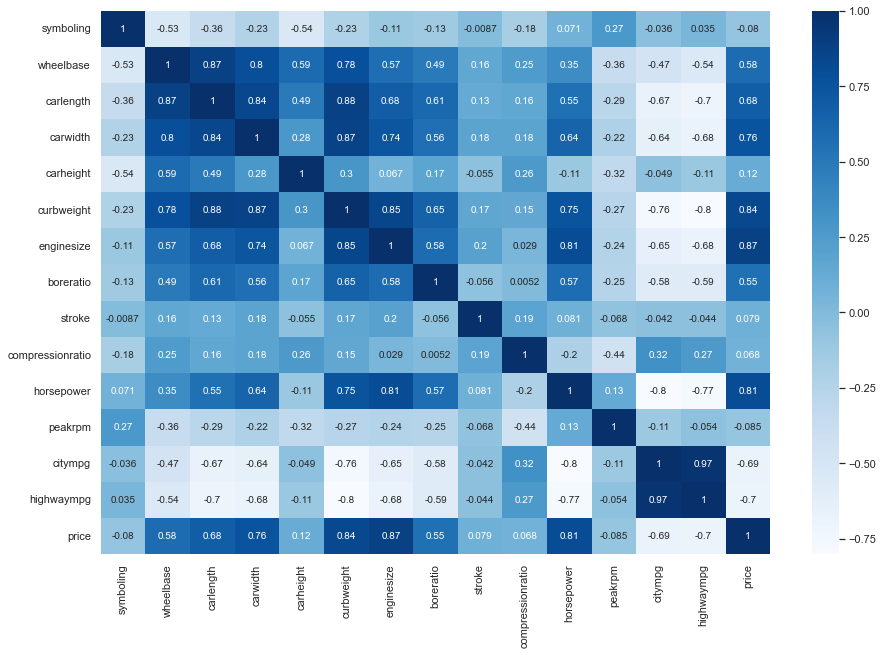

In [55]:
# droping columns we don't need
#del new_raw_data['car_ID']
del new_raw_data['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

pc = new_raw_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

In [56]:
new_raw_data.dtypes

car_ID                    int64
symboling                 int64
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int32
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelocation_front      uint8
enginelocation_rear       uint8
fuelsyst

In [57]:
# Split the data into X & y

X = new_raw_data.drop(['price'], axis = 1).values
X_columns = new_raw_data.drop(['price'], axis = 1)
y = new_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

(205, 47)
(205,)


In [58]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [59]:
dt.feature_importances_

array([0.06709744, 0.00836196, 0.10628199, 0.05797326, 0.03906812,
       0.11069647, 0.24115026, 0.00178623, 0.05316757, 0.00496111,
       0.01631418, 0.00885142, 0.09456605, 0.01426826, 0.01443607,
       0.04866888, 0.        , 0.00567654, 0.01141783, 0.00129677,
       0.00965873, 0.00129677, 0.0122833 , 0.01790168, 0.00665545,
       0.        , 0.00968976, 0.00389031, 0.00389031, 0.        ,
       0.        , 0.00493398, 0.        , 0.00839299, 0.        ,
       0.003083  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00968976, 0.        , 0.        , 0.        ,
       0.        , 0.00259354])

In [60]:
#del final_fi

# Calculating FI
for i, column in enumerate(new_raw_data.drop('price', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature car_ID:, 0.067
Importance of feature symboling:, 0.008
Importance of feature wheelbase:, 0.106
Importance of feature carlength:, 0.058
Importance of feature carwidth:, 0.039
Importance of feature carheight:, 0.111
Importance of feature curbweight:, 0.241
Importance of feature cylindernumber:, 0.002
Importance of feature enginesize:, 0.053
Importance of feature boreratio:, 0.005
Importance of feature stroke:, 0.016
Importance of feature compressionratio:, 0.009
Importance of feature horsepower:, 0.095
Importance of feature peakrpm:, 0.014
Importance of feature citympg:, 0.014
Importance of feature highwaympg:, 0.049
Importance of feature carbody_convertible:, 0.000
Importance of feature carbody_hardtop:, 0.006
Importance of feature carbody_hatchback:, 0.011
Importance of feature carbody_sedan:, 0.001
Importance of feature carbody_wagon:, 0.010
Importance of feature aspiration_std:, 0.001
Importance of feature aspiration_turbo:, 0.012
Importance of feature doornumbe

,level_0,index,Variable,Feature Importance Score
0,0,6.0,curbweight,0.241150
1,53,NaN,curbweight,0.241150
2,1,5.0,carheight,0.110696
3,52,NaN,carheight,0.110696
4,2,2.0,wheelbase,0.106282
...,...,...,...,...
89,43,32.0,fuelsystem_4bbl,0.000000
90,34,44.0,enginetype_rotor,0.000000
91,33,45.0,fueltype_diesel,0.000000
92,32,39.0,enginetype_dohcv,0.000000


In [61]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 47)
(41, 47)
(164,)
(41,)


In [62]:
# H0 All of the population coefficients are equal to zero (0).
# Ha At least one of the population coefficients is not equal to zero (0).
# Training the Regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
y_testpred = lm.predict(X_test)

In [63]:
y_test

203    22470
179    15998
12     20970
176    10898
121     6692
196    15985
150     5348
95      7799
36      7295
78      6669
47     32250
71     34184
20      6575
30      6479
93      7349
122     7609
9      17859
169     9989
177    11248
137    18620
132    11850
158     7898
26      7609
116    17950
106    18399
131     9895
165     9298
40     10295
89      5499
172    17669
21      5572
94      7299
192    13845
98      8249
74     45400
134    15040
2      16500
86      8189
117    18150
174    10698
147    10198
Name: price, dtype: int32

In [64]:
y_pred

array([39258.79285156,  9526.67299915,  6532.09403452, 12151.47998388,
        8508.41220107,  9782.88417392,  8138.05793859, 15645.        ,
        7754.10694149, 15460.91716195, 16521.71435493, 21256.29861178,
       31161.07396895,  6247.9799565 ,  8862.94032227, 18211.78049046,
       16696.90651505, 10371.47840477, 12147.37098212,  6421.27861977,
        7620.98678946, 18790.66162976,  5578.26787061, 16596.42569678,
        7984.13487568,  9463.64860913, 17267.02564697, 15588.49391027,
       34456.6271681 , 13197.1493966 , 12118.50739204, 10397.90363209,
       15915.07965334, 19926.61776387, 28021.33716929, 16208.8776559 ,
        6217.65775961, 12985.29952646, 10582.69478869, 18672.03967046,
        9137.3873407 ,  6915.67397422, 11887.83321607, 12775.36412513,
        6201.43868528, 10367.24173234,  7453.8334616 ,  9171.51498234,
       11727.27081103, 12066.32298746, 22970.28840822, 11107.53701577,
        7369.49325355, 18097.42517729,  4453.75626976,  6857.04353264,
      

In [65]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred) ) 
print("")

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test))
print("")
# The Root Mean Squared Error (RMSE)

print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))
print("")

# Coefficients
print('Coefficients: ', lm.coef_ )
print("")

# The Intercept
print('Intercept: ', lm.intercept_)

The Accuracy  on the training dataset is:  0.939012854622914
The Accuracy r2  on the training dataset prediction is:  0.939012854622914

The Accuracy  on the testing dataset is:  0.8508618050906

The RMSE  on the training dataset is:  1943.848395035627
The RMSE  on the testing dataset is:  3224.5179693899972

Coefficients:  [-1.53309499e+01  3.10151322e+02  5.98864078e+01 -2.93779170e+01
  5.46770707e+02  3.23313594e+02  5.31057960e+00 -1.43039529e+03
  1.76711113e+02 -8.12610784e+03 -5.48314526e+03 -7.86406633e+02
  1.35815983e+01  2.55446927e+00 -1.03377582e+01  2.12293090e+02
  3.08566895e+03 -1.97792999e+03  1.57227140e+02  1.36622407e+02
 -1.40158851e+03 -6.33439236e+02  6.33439236e+02  1.70495715e+02
 -1.70495715e+02 -7.21843059e+02 -8.91009633e+02  1.61285269e+03
 -4.22725069e+03  4.22725069e+03 -1.03956845e+03  7.52677402e+02
  6.50137888e+02  3.70909996e+03 -2.48809153e+03  1.31315797e+03
 -1.37635740e+03 -1.52105584e+03 -2.56656059e+03  3.60127325e+03
 -3.83628968e+03  9.7266

In [66]:
asdf = pd.DataFrame({"Actual":y_test,"Predicted":y_testpred})

In [67]:
asdf["Percentage"] = asdf["Predicted"]/asdf["Actual"]

In [68]:
asdf

,Actual,Predicted,Percentage
203,22470,20791.712233,0.925310
179,15998,19122.772697,1.195323
12,20970,19308.875406,0.920786
176,10898,8001.562366,0.734223
121,6692,6053.219303,0.904546
196,15985,16778.050188,1.049612
150,5348,6142.171086,1.148499
95,7799,5724.922872,0.734059
36,7295,7325.573572,1.004191
78,6669,7757.137288,1.163163


In [89]:
# Split the data into X & y

test1 = final_fi['Variable'][0:10].values

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 47)
(205,)
The Accuracy  on the testing dataset is:  0.8138850523763759
The RMSE  on the testing dataset is:  3602.143313875588
The MAE  on the testing dataset is:  2447.7774965826566


# Trying the recursive feature elimination process

In [90]:
# with Linear Regression

from sklearn.feature_selection import RFE

selector = RFE(lm, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_

print('Chosen best 10 feature by rfe:',X_columns.columns[selector.support_])

rfe_lr = X_columns.columns[selector.support_]

Chosen best 10 feature by rfe: Index(['carwidth', 'carbody_convertible', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'fuelsystem_4bbl',
       'fuelsystem_spfi', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohcv'],
      dtype='object')


In [91]:
# Split the data into X & y

test1 = rfe_lr

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 47)
(205,)
The Accuracy  on the testing dataset is:  0.8226144299201712
The RMSE  on the testing dataset is:  3516.6528965468374
The MAE  on the testing dataset is:  2410.4047460752345


In [92]:
# With Support vector regressor

from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_
print('Chosen best 10 feature by rfe:',X_columns.columns[selector.support_])

rfe_svr = X_columns.columns[selector.support_]

Chosen best 10 feature by rfe: Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize',
       'compressionratio', 'horsepower', 'carbody_hatchback', 'drivewheel_fwd',
       'drivewheel_rwd'],
      dtype='object')


In [93]:
# Split the data into X & y

test1 = rfe_svr

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 47)
(205,)
The Accuracy  on the testing dataset is:  0.8962481519089992
The RMSE  on the testing dataset is:  2689.4797644714704
The MAE  on the testing dataset is:  2045.5119192674774


# Trying other models

In [94]:
from sklearn.ensemble import RandomForestRegressor

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.87857909726018
The RMSE  on the testing dataset is:  2909.4914752165437
The MAE  on the testing dataset is:  2121.1311847103157


In [95]:
# Optimizing Random Forest R

from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = regr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [97]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000, random_state=0)

In [98]:
best_grid = grid_search.best_estimator_

regr = best_grid
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.8791273338526945
The RMSE  on the testing dataset is:  2902.9156128245904
The MAE  on the testing dataset is:  1662.0524670474829


# XG Boost Regressor

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', reg.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,reg.predict(X_test)))

The Accuracy  on the testing dataset is:  0.944538667933968
The RMSE  on the testing dataset is:  1966.3712165085378
The MAE  on the testing dataset is:  1374.4676099853177


In [101]:
# optimizing XGBoost Regressor

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = { 'max_depth': [3,6,9,12],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [102]:
clf.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 500}

In [103]:
# Training the model on best parameters

xgbr = xgb.XGBRegressor(seed = 20, colsample_bytree = 0.7, learning_rate= 0.1, max_depth=12, n_estimators=500)
xgbr.fit(X_train, y_train)
xgbr

y_pred = xgbr.predict(X_train)
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', xgbr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,xgbr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,xgbr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.9458283000245309
The RMSE  on the testing dataset is:  1943.3749150373783
The MAE  on the testing dataset is:  1242.6066239519816


# Neural Network Regressor - MLPRegressor

In [104]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.5674057750666428
The RMSE  on the testing dataset is:  5491.749498234063
The MAE  on the testing dataset is:  3636.640750707685


c:\Kiki\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [105]:
# Optimising MLPR

parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

regr = MLPRegressor(random_state=1, max_iter=500)

clf = GridSearchCV(regr, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

Best parameters: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


c:\Kiki\Python310\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-1.58703201e-01 -3.27494768e+00 -1.25620828e-01 -3.27494768e+00
 -2.59255871e-01 -3.27381256e+00 -6.41611519e-02 -3.27381256e+00
 -1.58662969e-01 -3.27494758e+00 -1.25576414e-01 -3.27494758e+00
 -2.61725956e-01 -3.27375874e+00 -6.48252745e-02 -3.27375874e+00
             nan  2.65090733e-01             nan  2.65090733e-01
 -1.91361717e+14  1.06236955e-01 -3.40189205e+14  1.06236955e-01
             nan  2.68992893e-01             nan  2.68992893e-01
 -1.91361717e+14  1.07837214e-01 -3.40189205e+14  1.07837214e-01]
  warnings.warn(
c:\Kiki\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [106]:
# Training the model on best parameters

regr = MLPRegressor(random_state=1, max_iter=500, activation='relu', alpha= 0.05, hidden_layer_sizes= (10, 30, 10), learning_rate= 'constant', solver= 'adam')
regr.fit(X_train, y_train)


y_pred = regr.predict(X_train)
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.31508110047738647
The RMSE  on the testing dataset is:  6910.1891519708315
The MAE  on the testing dataset is:  4912.798081893555


c:\Kiki\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Conclussions: XGBooster Regressor without optimization did the best job.

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into X & y

#del new_raw_data['Price Predictions']

X = new_raw_data.drop(['price'], axis = 1).values
X_columns = new_raw_data.drop(['price'], axis = 1)
y = new_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', reg.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,reg.predict(X_test)))

(205, 47)
(205,)
(164, 47)
(41, 47)
(164,)
(41,)
The Accuracy  on the testing dataset is:  0.944538667933968
The RMSE  on the testing dataset is:  1966.3712165085378
The MAE  on the testing dataset is:  1374.4676099853177


In [111]:
X_train.shape

(164, 47)

In [112]:
y_pred.shape

(164,)

C:\Users\krist\AppData\Local\Temp\ipykernel_18660\918239457.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)


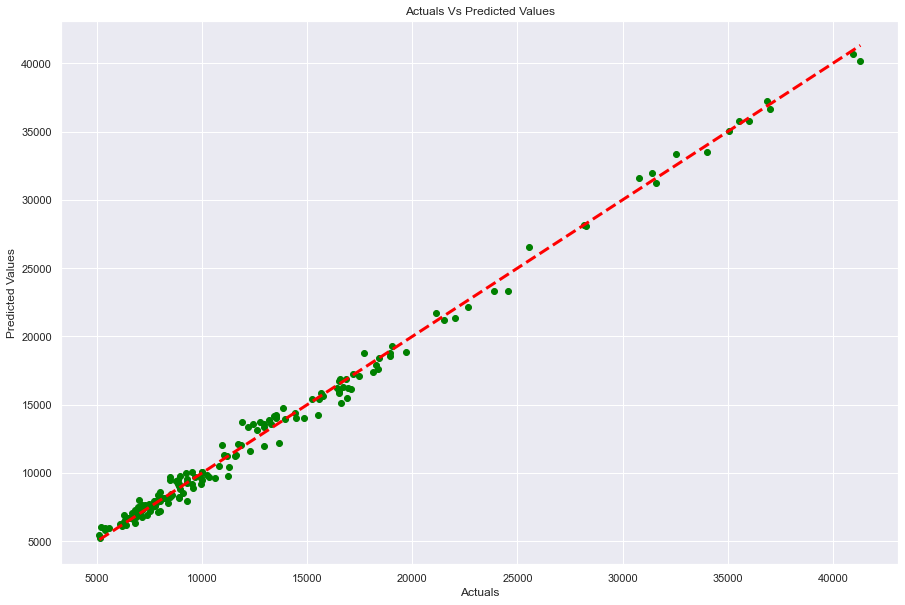

In [114]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
plt.show()

# Joining the original dataset with the predictions.

In [120]:
# Fixing the train df
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price Predictions'] = y_pred
print(final_df.shape)

# Fixing the test df
final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price Predictions'] = reg.predict(X_test)
print(final_df2.shape)

# unioning them
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()


# Left Joining to the original dataset the predictions
data['car_ID'] = data['car_ID'].astype(int)
final_df3['car_ID'] = final_df3['car_ID'].astype(int)

final_df4 = data.merge(final_df3[['car_ID','Phase','Price Predictions']], how = 'left', on = 'car_ID')
final_df4['CarName'] = final_df4['CarName'] + ' - ' + final_df4['car_ID'].astype(str)
print(final_df4.shape)
final_df4.head()

(164, 50)
(41, 50)
(205, 50)
(205, 28)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Phase,Price Predictions
0,1,3,alfa-romero giulia - 1,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,Existing data,14030.631995
1,2,3,alfa-romero stelvio - 2,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,Existing data,15868.214832
2,3,1,alfa-romero Quadrifoglio - 3,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,New unseen data,16644.131234
3,4,2,audi 100 ls - 4,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,Existing data,13923.215678
4,5,2,audi 100ls - 5,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,Existing data,17130.875554


In [144]:
data23 = pd.DataFrame(X_train, columns=X_columns.columns)
data23["Price"] = y_train.values
data23["Phase"] = "Existing data"
data23["Price Predictions"] = y_pred
data23

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_diesel,fueltype_gas,Price,Phase,Price Predictions
0,50.0,0.0,102.0,191.7,70.6,47.8,3950.0,12.0,326.0,3.54,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,36000,Existing data,35795.443337
1,189.0,2.0,97.3,171.7,65.5,55.7,2300.0,4.0,109.0,3.19,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9995,Existing data,9497.606135
2,143.0,0.0,97.2,172.0,65.4,52.5,2190.0,4.0,108.0,3.62,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7775,Existing data,7951.212684
3,56.0,3.0,95.3,169.0,65.7,49.6,2380.0,2.0,70.0,3.33,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10945,Existing data,12027.364761
4,167.0,1.0,94.5,168.7,64.0,52.6,2300.0,4.0,98.0,3.24,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9538,Existing data,10074.341551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,129.0,3.0,89.5,168.9,65.0,51.6,2800.0,6.0,194.0,3.74,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,37028,Existing data,36662.372489
160,120.0,1.0,93.7,157.3,63.8,50.8,2128.0,4.0,98.0,3.03,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7957,Existing data,8220.473856
161,134.0,2.0,99.1,186.6,66.5,56.1,2695.0,4.0,121.0,3.54,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12170,Existing data,13346.513420
162,141.0,2.0,93.3,157.3,63.8,55.7,2240.0,4.0,108.0,3.62,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7603,Existing data,7502.327862


In [145]:
data24 = pd.DataFrame(X_test, columns=X_columns.columns)
data24["Price"] = y_test.values
data24["Phase"] = "Unseen data"
data24["Price Predictions"] = reg.predict(X_test)
data24

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_diesel,fueltype_gas,Price,Phase,Price Predictions
0,204.0,-1.0,109.1,188.8,68.9,55.5,3217.0,6.0,145.0,3.01,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,22470,Unseen data,20442.231740
1,180.0,3.0,102.9,183.5,67.7,52.0,3016.0,6.0,171.0,3.27,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15998,Unseen data,16859.852068
2,13.0,0.0,101.2,176.8,64.8,54.3,2710.0,6.0,164.0,3.31,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,20970,Unseen data,21748.896848
3,177.0,-1.0,102.4,175.6,66.5,54.9,2414.0,4.0,122.0,3.31,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10898,Unseen data,10123.452885
4,122.0,1.0,93.7,167.3,63.8,50.8,1989.0,4.0,90.0,2.97,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6692,Unseen data,6734.280007
5,197.0,-2.0,104.3,188.8,67.2,56.2,2935.0,4.0,141.0,3.78,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,15985,Unseen data,13610.305648
6,151.0,1.0,95.7,158.7,63.6,54.5,1985.0,4.0,92.0,3.05,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5348,Unseen data,6583.434707
7,96.0,1.0,94.5,165.6,63.8,53.3,2028.0,4.0,97.0,3.15,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7799,Unseen data,6912.590801
8,37.0,0.0,96.5,157.1,63.9,58.3,2024.0,4.0,92.0,2.92,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7295,Unseen data,7163.471394
9,79.0,2.0,93.7,157.3,64.4,50.8,2004.0,4.0,92.0,2.97,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6669,Unseen data,6114.701005


In [149]:
data25 = pd.concat([data23, data24], ignore_index=True)
print(data23.shape)
print(data24.shape)
print(data25.shape)

(164, 50)
(41, 50)
(205, 50)


In [147]:
data25.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_diesel,fueltype_gas,Price,Phase,Price Predictions
0,50.0,0.0,102.0,191.7,70.6,47.8,3950.0,12.0,326.0,3.54,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,36000,Existing data,35795.443337
1,189.0,2.0,97.3,171.7,65.5,55.7,2300.0,4.0,109.0,3.19,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9995,Existing data,9497.606135
2,143.0,0.0,97.2,172.0,65.4,52.5,2190.0,4.0,108.0,3.62,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7775,Existing data,7951.212684
3,56.0,3.0,95.3,169.0,65.7,49.6,2380.0,2.0,70.0,3.33,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10945,Existing data,12027.364761
4,167.0,1.0,94.5,168.7,64.0,52.6,2300.0,4.0,98.0,3.24,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9538,Existing data,10074.341551


In [160]:
data26 = pd.merge(left=data, right=data25[["car_ID","Phase","Price Predictions"]], left_on="car_ID", right_on="car_ID", how="inner")

In [163]:
# Final dataset
data26.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Phase,Price Predictions
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,Existing data,14030.631995
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,Existing data,15868.214832
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,Unseen data,16644.131234
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,Existing data,13923.215678
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,Existing data,17130.875554


In [166]:
data26.rename(columns={"Price Predictions":"Price Prediction", "price":"Price"}, inplace=True)

In [167]:
data26

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Price,Phase,Price Prediction
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,Existing data,14030.631995
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,Existing data,15868.214832
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,Unseen data,16644.131234
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,Existing data,13923.215678
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,Existing data,17130.875554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,Existing data,16867.909577
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,Existing data,19311.680550
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,Existing data,21227.137279
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,Unseen data,20442.231740


<AxesSubplot:xlabel='carbody', ylabel='Price'>

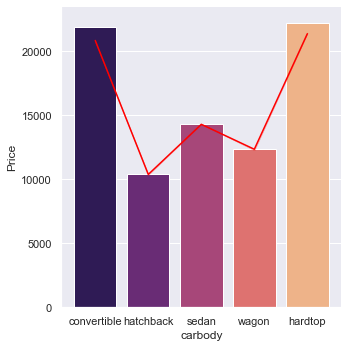

In [205]:
sns.catplot(x="carbody",y="Price", data=data26, kind="bar", ci=False, palette="magma")
sns.lineplot(x="carbody",y="Price Prediction", data=data26, ci=False, color="red")

In [203]:
comparison = data26.groupby("carbody", as_index=False).agg({"Price":"mean","Price Prediction":"mean"})
comparison["PriceDiff"] = comparison["Price"] - comparison["Price Prediction"]
comparison

,carbody,Price,Price Prediction,PriceDiff
0,convertible,21890.500000,20847.775935,1042.724065
1,hardtop,22208.500000,21374.448498,834.051502
2,hatchback,10376.652386,10378.609290,-1.956904
3,sedan,14344.270833,14294.850210,49.420623
4,wagon,12371.960000,12346.654989,25.305011


In [210]:
for i in ["carbody","fueltype","aspiration","enginelocation"]:
    oh = data26.groupby(i, as_index=False).agg({"Price":"mean","Price Prediction":"mean"})
    print(oh)

       carbody         Price  Price Prediction
0  convertible  21890.500000      20847.775935
1      hardtop  22208.500000      21374.448498
2    hatchback  10376.652386      10378.609290
3        sedan  14344.270833      14294.850210
4        wagon  12371.960000      12346.654989
  fueltype       Price  Price Prediction
0   diesel  15838.1500      15464.637328
1      gas  12999.7982      12941.968336
  aspiration         Price  Price Prediction
0        std  12611.270833      12550.952606
1      turbo  16298.166676      16080.995972
  enginelocation         Price  Price Prediction
0          front  12961.097361      12871.350481
1           rear  34528.000000      34514.697213
